----
# May_16_20_robust_rdd_in_R_rdroubst
----
* Name: Jikhan Jeong
* Ref: https://sites.google.com/site/rdpackages/rdrobust (package)
* Ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.429.1273&rep=rep1&type=pdf (R Journal)
* Ref: https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA11757 (Paper), Econometrica 2014
----

In [5]:
getwd()

[1] "/data/cahnrs/jikhan.jeong/stata kernel /Ordered Probit"

In [1]:
install.packages('rdrobust')

Installing package into ‘/home/jikhan.jeong/lib/R_libs’
(as ‘lib’ is unspecified)


In [1]:
library('rdrobust')

---
* **margin** ranges from -100 to 100, records the Democratic party's margin of victory in the statewide election for a given U.S. Senate seat which the vote sahre of the Demoratic party - that of the strongest opponent
* margin > 0, the Democratic party wins the election for that seat. The discontinuity in incumbency status that occurs at margin = 0, **running variable** is **margin**
* **vote** : ranges from 0 to 100, records the Democratic vote share in the following election for the same seat (6 year later), **the outcome variable**
---

In [2]:
data(rdrobust_RDsenate)

In [7]:
vote <- rdrobust_RDsenate$vote
summary(vote)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   42.67   50.55   52.67   61.35  100.00      93 

In [8]:
margin <- rdrobust_RDsenate$margin
summary(margin)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-100.000  -12.206    2.166    7.171   22.766  100.000 

In [13]:
head(rdrobust_RDsenate)

margin,vote
-7.6885610,36.09757
-3.9237082,45.46875
-6.8686604,45.59821
-27.6680565,48.47606
-8.2569685,51.74687
0.7324815,39.80264


In [15]:
print(dim(rdrobust_RDsenate))

[1] 1390    2


In [ ]:
---
### rdplot : automatic plot 
* graph_options not working in the jupyterlabl with stata 14
---

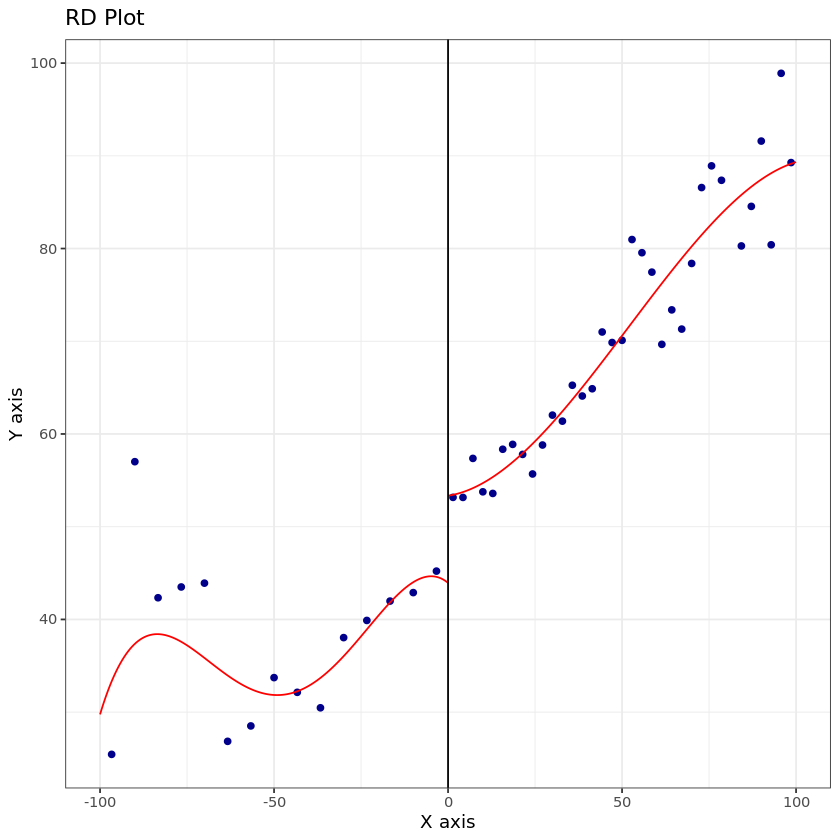

In [17]:
rdplot(y = vote, x = margin)

[1] "Evenly-spaced bins selected to mimic the underlying variabiity of the data and is implemented using spacing estimators"


Call: rdplot

Number of Obs.                 1297
Kernel                      Uniform

Number of Obs.                 595            702
Eff. Number of Obs.            595           702
Order poly. fit (p)              4              4
BW poly. fit (h)           100.000        100.000
Number of bins scale             1              1


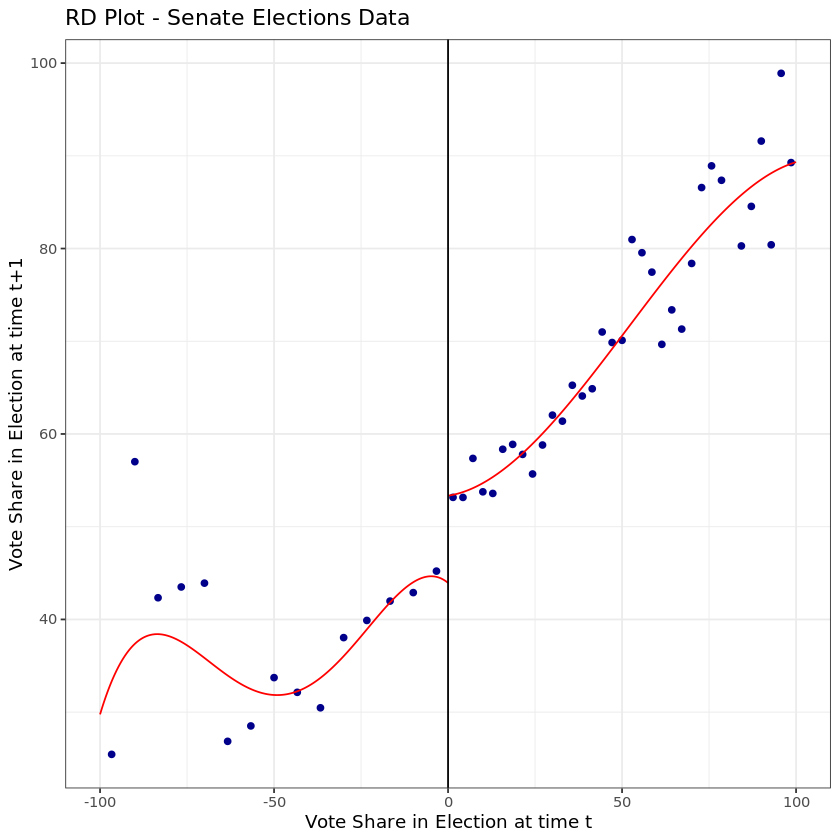

In [19]:
print('Evenly-spaced bins selected to mimic the underlying variabiity of the data and is implemented using spacing estimators')
(rdplot(y = vote, x = margin, 
        title = "RD Plot - Senate Elections Data",
        y.label = "Vote Share in Election at time t+1",
        x.label = "Vote Share in Election at time t"))

[1] "Evenly-spaced bins selected using IMSE-optimal seector and spacing estimators"


Call: rdplot

Number of Obs.                 1297
Kernel                      Uniform

Number of Obs.                 595            702
Eff. Number of Obs.            595           702
Order poly. fit (p)              4              4
BW poly. fit (h)           100.000        100.000
Number of bins scale             1              1


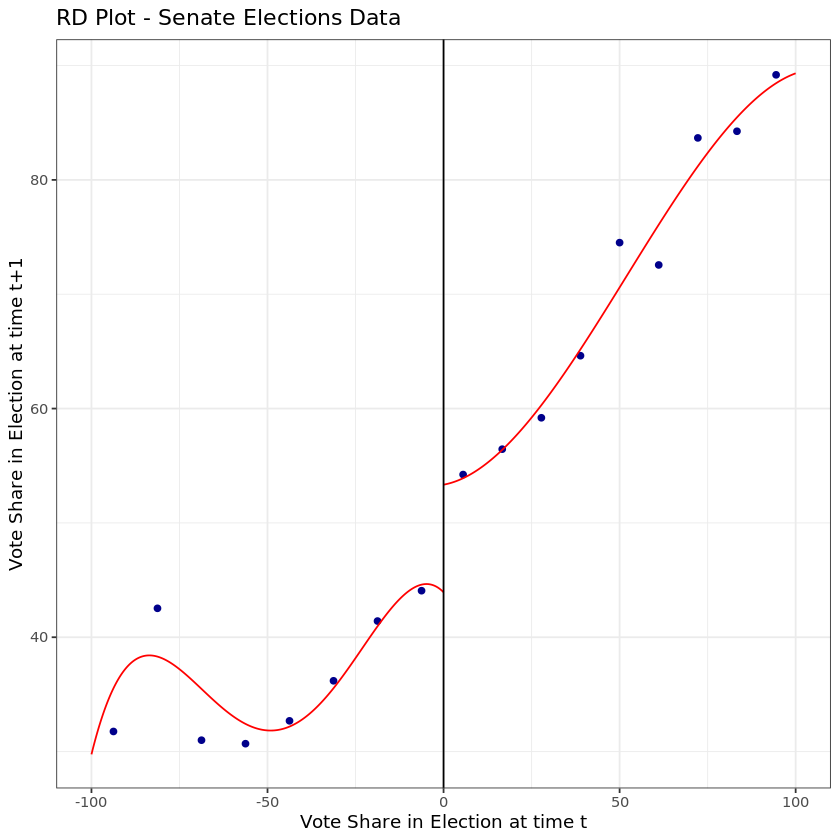

In [22]:
print('Evenly-spaced bins selected using IMSE-optimal seector and spacing estimators')
(rdplot(y = vote, x = margin, binselect ="es", 
        title = "RD Plot - Senate Elections Data",
        y.label = "Vote Share in Election at time t+1",
        x.label = "Vote Share in Election at time t"))

[1] "Evenly-spaced bins selected using IMSE-optimal seector and spacing estimators, + scale to increasing bin numbers and variability"


Call: rdplot

Number of Obs.                 1297
Kernel                      Uniform

Number of Obs.                 595            702
Eff. Number of Obs.            595           702
Order poly. fit (p)              4              4
BW poly. fit (h)           100.000        100.000
Number of bins scale             5              5


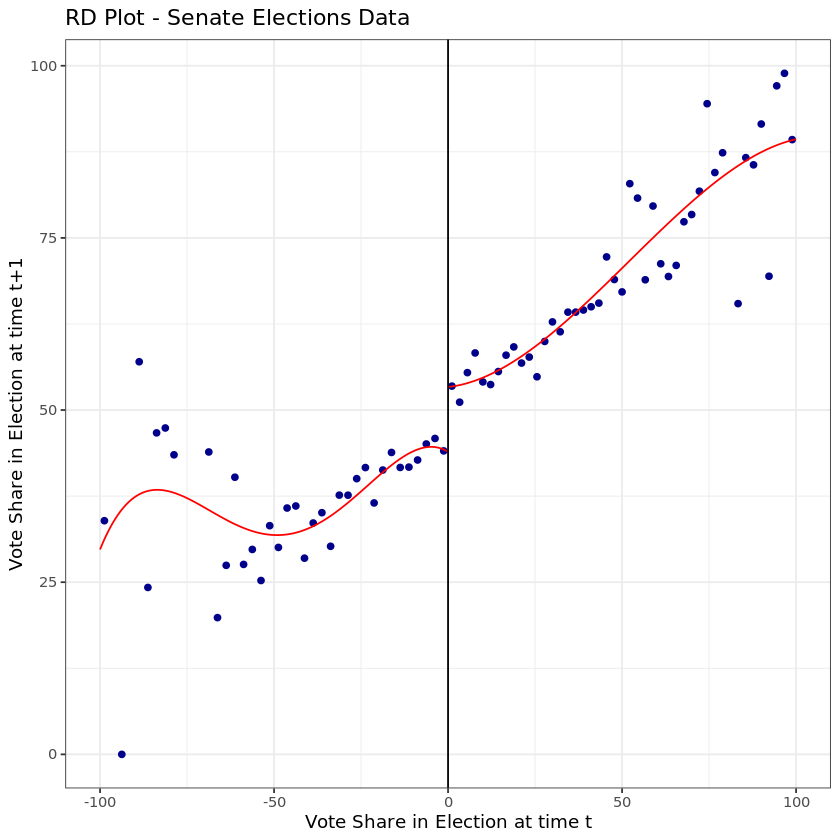

In [23]:
print('Evenly-spaced bins selected using IMSE-optimal seector and spacing estimators, + scale to increasing bin numbers and variability')
(rdplot(y = vote, x = margin, binselect ="es", scale =5,
        title = "RD Plot - Senate Elections Data",
        y.label = "Vote Share in Election at time t+1",
        x.label = "Vote Share in Election at time t"))

---
### rdrobust results
* ,all option recommended
---

In [29]:
(rdrobust(y = vote, x = margin))

Call: rdrobust

Number of Obs.                 1297
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 595         702
Eff. Number of Obs.            360         323
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 17.754      17.754
BW bias (b)                 28.028      28.028
rho (h/b)                    0.633       0.633
Unique Obs.                    595         665


In [31]:
(rdrobust(y = vote, x = margin, all=TRUE))

Call: rdrobust

Number of Obs.                 1297
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 595         702
Eff. Number of Obs.            360         323
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 17.754      17.754
BW bias (b)                 28.028      28.028
rho (h/b)                    0.633       0.633
Unique Obs.                    595         665


In [ ]:
* package is weired, using stata may better in 

### Badwedight selection

In [32]:
 rdbwselect(y = vote, x = margin, all = TRUE)

Call: rdbwselect

Number of Obs.                 1297
BW type                         All
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 595         702
Order est. (p)                   1           1
Order bias  (q)                  2           2
Unique Obs.                    595         665


In [34]:
rdbwselect(y = vote, x = margin, bwselect = "CV", cvgrid_min = 10, cvgrid_max = 80, cvplot = TRUE)

ERROR: Error in rdbwselect(y = vote, x = margin, bwselect = "CV", cvgrid_min = 10, : unused arguments (cvgrid_min = 10, cvgrid_max = 80, cvplot = TRUE)
